  # ✤ Feature Selection with all 3 Methods and ML Regression models comparison
### Task:

+ Make a preprocessing with your own dataset and answer the following questions: 
1.	"what (intro) ,  (describe and show original dataset)
2.	why ( methods ) ,
3.	 how ( by builtt-in functions or manually) "   
4.	include all the methods for feature selection and feature exploration ( explain each selection from beginning of selection ( row data )

+ the comparison resullts of  the models  ( regression /classification / clustering) with preprocessing ( at least 2 different method)  and without features.


# ✤ Analysis of Worldwide Suicide Rates
### ✤ Introduction

&emsp; According to this dataset of Global Suicide Rates , people of different ages have committed suicides because of pressure, barriers, or a lack of mental healthcare across all countries. In addition, in this analysis I am going to compare the prediction of the  suicides number depending on different age groups, genders, generations, countries, and ratio of suicides per 100k population over period of 1985 and 2015 years.

&emsp;  Suicide takes place throughout the life and it has been one of the leading causes of death in many countries. Unfortunately, each suicide is a tragic loss of human's life that has own consequences on people left apart, like family and friends.

 &emsp;  The goal of the Global Suicide Rates analysis is to demonstrate statistics of 27 820 observations, which grouped by certain age ranges, gender(male/female), number of suicides, population of country, GDP (gross domestic product) per year and person, HDI (human development index) different generations during the period of 1985 & 2015 across the world. In addition, we will find which factors had more influence on the number of suicides in 101 countries.


My analysis will be based on dataset during the 30 years, because I found this great dataset on Kaggle website=> 
+ https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## 2. Data description

+  Country –  geographical location on a map.
+  Year – the time when suicide happened.
+  Sex – gender as Male/Female.
+  Age – age of individuals who committed suicide.
+  Suicides_no – number of suicides.
+  Population – people living in a particular country.
+  Ratio(suicides_no/pop) – # of suicides per country's population.
+  HDI for year – human development index in each year.
+  GDP_per year – gross domestic value in each year.
+  GDP_per_capita – gross domestic value for each person. 
+  Generation – name of different age groups.

In [ ]:
#Importing 'must-have' Libraries like these:

import numpy as np  # to access data in any formats.
import pandas as pd  # to work with data frame formats.
import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#observing my dataset from 'suicide' csv file:
data = pd.read_excel('suicide-excel.xls')

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('$', '')

In [ ]:
#by using rename() function:
data.rename(columns={'sex':'gender'},inplace=True)

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,country-year,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**✤  From results of dataset, I can count total number of rows & columns, with shape function :**

In [ ]:
print(data.shape)

(27820, 12)


In [ ]:
columns = ['year', 'age', 'generation']
for col in columns:
    print("\n {}'s - Unique values : \n {}".format(col, data[col].unique()))


 year's - Unique values : 
 [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]

 age's - Unique values : 
 ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']

 generation's - Unique values : 
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


✤ In this dataset,as you noticed from last 5 rows in table,there is no rows with data in 2016 year, because it is incomplete for some countries. So,I want to delete data related to this year (2016):

In [ ]:
data = data[data['year'] != 2016]
# removing specific values in a dataframe

In [ ]:
data.shape

(27660, 12)

In [ ]:
# deleting unneeded columns:
#data.drop(['country-year'], inplace=True)
data.drop('country-year', axis=1, inplace=True)

✤ **Now I can check and see, if there are any NULL values:**

In [ ]:
# again by using isnull() function and we count empty values in columns:
data.isnull().any()
# So, bollean "false" means that there is no null data:

country             False
year                False
gender              False
age                 False
suicides_no         False
population          False
suicides/100kpop    False
hdiforyear           True
gdp_for_year        False
gdp_per_capita      False
generation          False
dtype: bool

**✤ As you can see from initial 5 rows of table, there are null values(NaN) in HDI column, and we should guess all other missing values from table:**

In [ ]:
# by using isnull() function and we count empty values in columns:
data.isnull().sum()

country                 0
year                    0
gender                  0
age                     0
suicides_no             0
population              0
suicides/100kpop        0
hdiforyear          19296
gdp_for_year            0
gdp_per_capita          0
generation              0
dtype: int64

**I checked my dataset in  file, and here I understand that:**
+ In **"HDI column"** is Missing at Random(MAR) => **Method of Filling is "Mean"**

In [ ]:
# importing new library to fill with mean:
from sklearn.impute import SimpleImputer

# Missing values is represented using NaN: 
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
data.hdiforyear = imputer.fit_transform(data['hdiforyear'].values.reshape(-1,1))

## ✤  Preparing a variables for 'Age- ranges':

In [ ]:
data['age'] = data['age'].str.replace('years','')

In [ ]:
data['age'].unique()

array(['15-24 ', '35-54 ', '75+ ', '25-34 ', '55-74 ', '5-14 '],
      dtype=object)

In [ ]:
data['age'] = data['age'].replace('5-14 ',1).replace('15-24 ',2).replace('25-34 ',3).replace('35-54 ',4).replace('55-74 ',5).replace('75+ ',6)

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


## ✤  One-Hot Encoding and Preparing catrgorical variables like 'Gender' and 'Generation':
+ **In such way that [ Male is 1 and Female is 0]**
+ **In such way that Each 6 genearation from 1 to 6.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# importing NEW library to encode:

label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['generation'] = label.fit_transform(data['generation'])

In [ ]:
data.head()

,country,year,gender,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,1,2,21,312900,6.71,0.776601,"2,156,624,900",796,2
1,Albania,1987,1,4,16,308000,5.19,0.776601,"2,156,624,900",796,5
2,Albania,1987,0,2,14,289700,4.83,0.776601,"2,156,624,900",796,2
3,Albania,1987,1,6,1,21800,4.59,0.776601,"2,156,624,900",796,1
4,Albania,1987,1,3,9,274300,3.28,0.776601,"2,156,624,900",796,0


### ✤ Dropping unneeded columns 

In [ ]:
data.drop('gdp_for_year', axis=1, inplace=True)

In [ ]:
data.drop('country', axis=1, inplace=True)
data.drop('suicides/100kpop', axis=1, inplace=True)

In [ ]:
data.shape

(27660, 8)

In [ ]:
# HERE IS MY FINAL DATASET:
data

,year,gender,age,suicides_no,population,hdiforyear,gdp_per_capita,generation
0,1987,1,2,21,312900,0.776601,796,2
1,1987,1,4,16,308000,0.776601,796,5
2,1987,0,2,14,289700,0.776601,796,2
3,1987,1,6,1,21800,0.776601,796,1
4,1987,1,3,9,274300,0.776601,796,0
...,...,...,...,...,...,...,...,...
27815,2014,0,4,107,3620833,0.675000,2309,2
27816,2014,0,6,9,348465,0.675000,2309,5
27817,2014,1,1,60,2762158,0.675000,2309,3
27818,2014,0,1,44,2631600,0.675000,2309,3


**✤  Additionally, we should know datatypes of our variables, it will help us in analysis:**
 + object-> categorical data
 + int64 -> numerical data 
 + float64-> numerical data 

In [ ]:
# ALL DATATYPES ARE numerical:
data.dtypes

year                int64
gender              int32
age                 int64
suicides_no         int64
population          int64
hdiforyear        float64
gdp_per_capita      int64
generation          int32
dtype: object

In [ ]:
data.to_excel("dataset-2.xlsx")

In [ ]:
new_data = pd.read_excel('dataset-2.xlsx')

In [ ]:
new_data = new_data.drop('Unnamed: 0',axis=1)

In [ ]:
new_data.tail()

,year,gender,age,suicides_no,population,hdiforyear,gdp_per_capita,generation
27655,2014,0,4,107,3620833,0.675,2309,2
27656,2014,0,6,9,348465,0.675,2309,5
27657,2014,1,1,60,2762158,0.675,2309,3
27658,2014,0,1,44,2631600,0.675,2309,3
27659,2014,0,5,21,1438935,0.675,2309,0


**✤  Also, there is a Statistical description of my dataset, it illustrates a fairly wide range of data such as total amount, average mean value, standard deviation, interqurtile range and min/max values:**

In [ ]:
new_data.describe()

,year,gender,age,suicides_no,population,hdiforyear,gdp_per_capita,generation
count,27660.000000,27660.000000,27660.000000,27660.000000,2.766000e+04,27660.000000,27660.000000,27660.000000
mean,2001.173102,0.500000,3.500000,243.413485,1.850689e+06,0.776601,16815.568330,2.700145
std,8.418754,0.500009,1.707856,904.490185,3.920658e+06,0.051340,18861.585497,1.809814
min,1985.000000,0.000000,1.000000,0.000000,2.780000e+02,0.483000,251.000000,0.000000
25%,1994.000000,0.000000,2.000000,3.000000,9.753525e+04,0.776601,3436.000000,1.000000
50%,2002.000000,0.500000,3.500000,25.000000,4.307250e+05,0.776601,9283.000000,2.000000
75%,2008.000000,1.000000,5.000000,132.000000,1.491041e+06,0.776601,24796.000000,4.000000
max,2015.000000,1.000000,6.000000,22338.000000,4.380521e+07,0.944000,126352.000000,5.000000


#  ✤  Data Preprocessing

##  ✤ Normalisation of Whole dataset ✤

In [ ]:
from sklearn.preprocessing import Normalizer
#importing Normalisation Library.

scaler = Normalizer().fit(new_data)
normalizeData = scaler.transform(new_data)
normalizeData = pd.DataFrame(normalizeData, index = new_data.index, columns = new_data.columns)
normalizeData

,year,gender,age,suicides_no,population,hdiforyear,gdp_per_capita,generation
0,0.006350,3.195834e-06,6.391669e-06,0.000067,0.999977,2.481889e-06,0.002544,6.391669e-06
1,0.006451,3.246675e-06,1.298670e-05,0.000052,0.999976,2.521371e-06,0.002584,1.623337e-05
2,0.006859,0.000000e+00,6.903505e-06,0.000048,0.999973,2.680635e-06,0.002748,6.903505e-06
3,0.090711,4.565202e-05,2.739121e-04,0.000046,0.995214,3.545341e-05,0.036339,4.565202e-05
4,0.007244,3.645532e-06,1.093660e-05,0.000033,0.999970,2.831125e-06,0.002902,0.000000e+00
...,...,...,...,...,...,...,...,...
27655,0.000556,0.000000e+00,1.104718e-06,0.000030,1.000000,1.864211e-07,0.000638,5.523589e-07
27656,0.005779,0.000000e+00,1.721771e-05,0.000026,0.999961,1.936992e-06,0.006626,1.434809e-05
27657,0.000729,3.620355e-07,3.620355e-07,0.000022,0.999999,2.443740e-07,0.000836,1.086107e-06
27658,0.000765,0.000000e+00,3.799967e-07,0.000017,0.999999,2.564978e-07,0.000877,1.139990e-06


### ✤ Train and Test Split - Ratio 70 / 30
+ Now let's split the data into a training set and a testing set. We'll train out model on the training set and then use the test set to evaluate the model. To do that, we need to import the following:

In [ ]:
from sklearn.model_selection import train_test_split
# X and y arrays:
X = normalizeData.drop("age", axis = 1) # All columns except this column.
y = normalizeData["age"] # Only this column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (19362, 7) (19362,)
Test (8298, 7) (8298,)


## ✤ Feature Selection -1. FilteR method 
## ✤ Pearson's Correlation => f_regression()
+ for numeric input and numeric output:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

**For the correlation statistic, I will use  f_regression() function. This function can be used in selecting  top k most relevant features via the SelectKBest().**

In [ ]:
# feature selection
f_selector = SelectKBest(score_func = f_regression, k =5)
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)

In [ ]:
# apply feature selection
print('Train', X_train_fs.shape)
print('Test', X_test_fs.shape)

Train (19362, 5)
Test (8298, 5)


**Let's plot features importance bar chart**

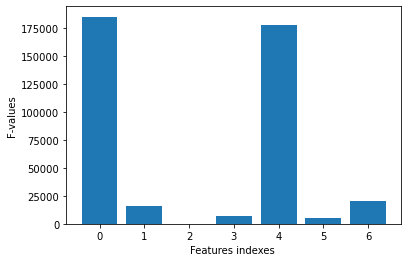

In [ ]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("Features indexes ")
plt.ylabel("F-values")
plt.show()

+ Feature 0: 179763.220458
+ Feature 1: 16632.684763
+ Feature 2: 83.152841
+ Feature 3: 7391.833461
+ Feature 4: 173801.832796
+ Feature 5: 5971.845083
+ Feature 6: 19650.071487 

### ✤  1. Model of Linear Regression for Regression

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
# LinearRegression Model with SELECTION:
model_lin_reg1 = LinearRegression().fit(X_train_fs, y_train)
# evaluate the model
print('With Feature Selection -Score is => ', model_lin_reg1.score(X_test_fs, y_test))

With Feature Selection -Score is =>  0.8961499241299091


In [ ]:
# LinearRegression Model WIHTOUT:
model_lin_reg2 = LinearRegression().fit(X_train, y_train)
# evaluate the model
print('Without f.selection - Score is => ', model_lin_reg2.score(X_test, y_test))

Without f.selection - Score is =>  0.9154316002610247


### ✤Creating a function to make Model Evaluation:

In [ ]:
from sklearn import metrics

In [ ]:
# let's create a function for all metrics at the same time:

def print_evaluate(true, predicted):  
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    maxx = metrics.max_error(true, predicted)
    
    print('R-squared', np.round(r2_square,3))
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('MAX:', maxx)

**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
# Linear regression WITH feature selection evaluation:
test_pred_1 = model_lin_reg1.predict(X_test_fs)
print_evaluate(y_test, test_pred_1)

R-squared 0.896
MSE: 3.357286853143288e-09
RMSE: 5.794209914339735e-05
MAE: 2.6870992482912713e-05
MAX: 0.0004625249790070806


In [ ]:
# Linear regression WITHOUT feature selection evaluation:
test_pred_2 = model_lin_reg2.predict(X_test)
print_evaluate(y_test, test_pred_2)

R-squared 0.915
MSE: 2.7339448166623652e-09
RMSE: 5.2287138157125845e-05
MAE: 2.3734978795221784e-05
MAX: 0.00045588638965567884


## ✤ Feature Selection -2. Wrapper Method 
## ✤ Recursive Feature Elimination => RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(),n_features_to_select=7)


rfe_gb.fit(X_train, y_train)
# transform train input data
X_train_grb = rfe_gb.transform(X_train)
# transform test input data
X_test_grb = rfe_gb.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor())
# ,n_features_to_select=7

rfe_gb.fit(X_train, y_train)
# transform train input data
X_train_grb = rfe_gb.transform(X_train)
# transform test input data
X_test_grb = rfe_gb.transform(X_test)

In [ ]:
print("Num Features: %d" % rfe_gb.n_features_)

Num Features: 3


In [ ]:
print("Selected Features: %s" % rfe_gb.support_)

Selected Features: [ True False False False  True False  True]


In [ ]:
print("Feature Ranking: %s" % rfe_gb.ranking_)

Feature Ranking: [1 5 4 2 1 3 1]


In [ ]:
#  Model with SELECTION:
model_recfel3 = GradientBoostingRegressor().fit(X_train_grb, y_train)
# evaluate the model
print('With Feature Selection -Score is => ', model_recfel3.score(X_test_grb, y_test))

With Feature Selection -Score is =>  0.9692354617555428


In [ ]:
#  Model with SELECTION:
model_recfel4 = GradientBoostingRegressor().fit(X_train, y_train)
# evaluate the model
print('Without Feature Selection -Score is => ', model_recfel4.score(X_test, y_test))

Without Feature Selection -Score is =>  0.9744524604247172


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
# Linear regression WITH feature selection evaluation:
test_pred_3 = model_recfel3.predict(X_test_grb)
print_evaluate(y_test, test_pred_3)

R-squared 0.969
MSE: 9.945623912720375e-10
RMSE: 3.1536683263654054e-05
MAE: 1.410803523059919e-05
MAX: 0.00037313696241685556


In [ ]:
# Linear regression WITH feature selection evaluation:
test_pred_4 = model_recfel4.predict(X_test)
print_evaluate(y_test, test_pred_4)

R-squared 0.974
MSE: 8.259061731793766e-10
RMSE: 2.873858335373156e-05
MAE: 1.2393505705095361e-05
MAX: 0.00035852357465194823


## ✤ Feature Selection -3. Embedded Method 
## ✤ L Regularisation -> SelectFromModel ->Ridge regression


In [ ]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import Ridge

selection3 = SelectFromModel(Ridge(alpha=1.0))
selection3.fit(X_train, y_train)


X_train_emb = selection3.transform(X_train)
# transform test input data
X_test_emb = selection3.transform(X_test)

In [ ]:
#  Model with SELECTION:
model_recfel5 = Ridge().fit(X_train_emb, y_train)
# evaluate the model
print('With Feature Selection -Score is => ', model_recfel5.score(X_test_emb, y_test))

With Feature Selection -Score is =>  0.8956522814102016


In [ ]:
#  Model with SELECTION:
model_recfel_6 = Ridge().fit(X_train, y_train)
# evaluate the model
print('Without Feature Selection -Score is => ', model_recfel_6.score(X_test, y_test))

Without Feature Selection -Score is =>  0.9136201585994028


**✤Let's predict by using above funciton, check all metrics, such as MAE,MSE,MAX,R2:**

In [ ]:
# Linear regression WITH feature selection evaluation:
test_pred_5 = model_recfel5.predict(X_test_emb)
print_evaluate(y_test, test_pred_5)

R-squared 0.896
MSE: 3.3733747504937588e-09
RMSE: 5.80807605881135e-05
MAE: 2.632759984275669e-05
MAX: 0.0004892862362329887


In [ ]:
# Linear regression WITH feature selection evaluation:
test_pred_6 = model_recfel_6.predict(X_test)
print_evaluate(y_test, test_pred_6)

R-squared 0.914
MSE: 2.792505479472149e-09
RMSE: 5.284416220806371e-05
MAE: 2.3342473995404326e-05
MAX: 0.0004343092945907143


## ✤ Feature ExtractioN with PCA

## ✤  => Principal Component Analysis

In [ ]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X)
# Determine transformed features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#  Model with SELECTION:
model_recfel_7 = PCA().fit(X_train_pca, y_train)
# evaluate the model
print('With Feature Extraction -Score is => ', model_recfel_7.score(X_test_pca, y_test))

With Feature Extraction -Score is =>  39.74085233124504


In [ ]:
#  Model with SELECTION:
model_recfel_8 = PCA().fit(X_train, y_train)
# evaluate the model
print('Without Feature Extraction -Score is => ', model_recfel_8.score(X_test, y_test))

Without Feature Extraction -Score is =>  39.740852331245165


## ✤ Collecting all data Model  Scores in  Dataframe:


In [ ]:
#data
With_Feature = ['89.1 %','96.0 %','90.0 %',' 39.6 %']
Without_Feature = ['90.2 %','97.6 %','92.1 %', '39.7 %']
#columns:
columns = {'With_Feature': With_Feature, 'Without_Feature': Without_Feature}

models=['FS.Filter_Method','FS.Wrapper_Method' ,'FS.Embedded_Method','Feature_Extraction']
result = pd.DataFrame(data = columns,index = models)
result

,With_Feature,Without_Feature
FS.Filter_Method,89.1 %,90.2 %
FS.Wrapper_Method,96.0 %,97.6 %
FS.Embedded_Method,90.0 %,92.1 %
Feature_Extraction,39.6 %,39.7 %


## ✤ Conclusion

✤ In general, These dataset about Suicide Rates  is was so huge - **27 820 observations and 12 columns**, about among 100 countries during 30 years from 1985 to 2015. After preprocessing, there was **only 7 columns with 22660 observations**
### ✤ Firstly, about preparing data:
**✤ I find out how many columns and rows was in this dataset, then I manipulated with my data by these steps=>** 
+ checking for NAN/empty values,
+ filling null values by methods like **Mean Imputation** using library Imputer,
+ also deleting some unnecessary columns **drop()**,
+ retrieving unique names for categorical data like generation, age groups,gender.and **Encoding them**.

### ✤ Secondly, about Preprocessing by Normalisation:
+ **  I used ready imported library called preprocessing, from it I used Normaliser() functions.**
+ **✤  By this way, I applied to the whole data, I used normalised data.**

### ✤ Thirdly, about creating all Models with Feature Selection & Extraction:
+ I splitted my data for train and test data, with **ratio-70/30**
+ And made Feature Selection and Feature Extraction methods.
+ And created models with them, and checked the accuracy scores.

### ✤ COMPARISON of Scores btw Models:
+ So, for all 3 methods of Feature Selection, scores were 90+ %, and difference is little between them.
+ In addition, in Feature Extraction, scores were low,about 40% +.

### ✤ As a result, the scores were extremely high, with and without features about 90%.